In [1]:
import sim_modules as sm
import numpy as np
import matplotlib.pyplot  as plt

number = 4
size=6
path='/Users/reneehlozek/Code/CIFAR_Network/GIMME/220429.FinalMatrices/'
file = path+'%i.csv'%number
cols = 2*size
data = np.loadtxt(file, skiprows=1, usecols=range(0,cols), delimiter=',')
matContemp = data[:,size:] #same day (contemporaneous) beta values
matLagged = data[:,:size] #lagged beta values

### Choose the parameters of your covariance structure, amplitude of the noise matrices and the measurement noise

In [50]:
# These settings match the ones we have had in R simulation
covContemp = np.random.randn(size,size)
covLagged = np.random.randn(size,size)
ampContemp = 0.1
ampLagged = 0.05
ampMeasure = 1.0
measurecov = ampMeasure*np.eye(size)
start = np.ones(size)
steps=100

In [51]:
maskContemp =  sm.make_mask(matContemp, contemp=True)
maskLagged = sm.make_mask(matLagged, contemp=False)


# matComptempNoisy = sm.coeff_draw_from_cov(ampContemp,matContemp,covContemp,maskContemp)
# matLaggedNoisy = sm.coeff_draw_from_cov(ampLagged,matLagged,covLagged,maskLagged)

samples = sm.generate_timeseries(start, steps, ampContemp, matContemp, covContemp, ampLagged, matLagged, covLagged,measurecov)

Measured sig = 1.12, input sig = 1.00
Measured sig = 0.96, input sig = 1.00
Measured sig = 1.01, input sig = 1.00
Measured sig = 1.13, input sig = 1.00
Measured sig = 0.92, input sig = 1.00
Measured sig = 1.18, input sig = 1.00


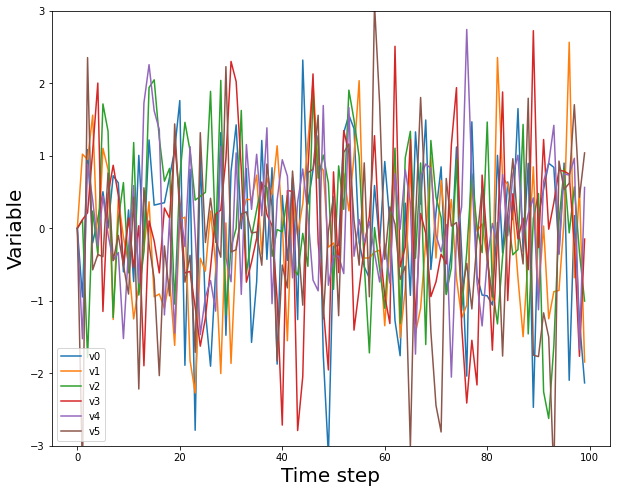

In [52]:
fig=plt.figure(3, figsize=(10,8))
fig.patch.set_facecolor('white')

for i in range(size):
    plt.plot(samples[:,i], label='v%i'%i)
    print("Measured sig = %2.2f, input sig = %2.2f" %(np.std(samples[:,i]), ampMeasure))
plt.ylim([-3,3])
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Variable', fontsize=20)
plt.legend(loc='best')
plt.savefig('samples_amplitude%2.2f_lagamp%2.2f.png'%(ampMeasure, ampLagged))
